In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [43]:
colo=pd.DataFrame({"Year":['2015', '2016', '2017', '2018', '2019'],
   "ColoPRCP":[21.73, 17.08, 18.91, 14.96, 18.91]})
firect=pd.DataFrame({"Year":['2015', '2016', '2017', '2018', '2019'],
                     "Fires":[602, 954, 794, 1196, 802]})
fireacre=pd.DataFrame({"Year":['2015', '2016', '2017', '2018', '2019'],
                     "Fires":[10177.700, 110153.095, 67968.940, 495431.910, 38173.540]})
national=pd.DataFrame({"Year":['2015', '2016', '2017', '2018', '2019'],
   "NationalPrecp":[34.59, 31.42, 32.31, 34.65, 34.82]})

In [44]:
precp=pd.merge(colo, national, on='Year')
firecombo=pd.merge(firect, fireacre, on='Year')
fireprcp=pd.merge(firecombo, precp, on ='Year')
fireprcp=fireprcp.rename(columns={"Fires_x":"FireCount", 'Fires_y': 'FireAcres'})
fireprcp

,Year,FireCount,FireAcres,ColoPRCP,NationalPrecp
0,2015,602,10177.700,21.73,34.59
1,2016,954,110153.095,17.08,31.42
2,2017,794,67968.940,18.91,32.31
3,2018,1196,495431.910,14.96,34.65
4,2019,802,38173.540,18.91,34.82


In [45]:
critical_value=stats.chi2.ppf(q=0.95, df=4)
critical_value

9.487729036781154

In [46]:
# Run the chi square test with stats.chisquare()
stats.chisquare(fireprcp['FireCount'], fireprcp['ColoPRCP'])

Power_divergenceResult(statistic=224327.42488839044, pvalue=0.0)

In [47]:
# Run the chi square test with stats.chisquare()
stats.chisquare(fireprcp['FireAcres'], fireprcp['ColoPRCP'])

Power_divergenceResult(statistic=17442362818.693558, pvalue=0.0)

In [48]:
# Run the chi square test with stats.chisquare()
stats.chisquare(fireprcp['FireCount'], fireprcp['FireAcres'])

Power_divergenceResult(statistic=713282.0669711683, pvalue=0.0)

Text(0.5, 1.0, 'Annual Precip by Year in Colorado')

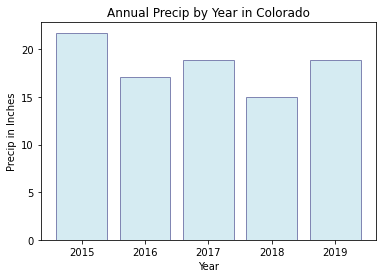

In [49]:
x_axis=fireprcp['Year']
y_axis=fireprcp['ColoPRCP']
plt.bar(x_axis, y_axis, color='lightblue', edgecolor='midnightblue', alpha=0.5, align='center')
plt.xlabel('Year')
plt.ylabel('Precip in Inches')
plt.title('Annual Precip by Year in Colorado')



Text(0.5, 1.0, 'Annual Precip by Year in the US')

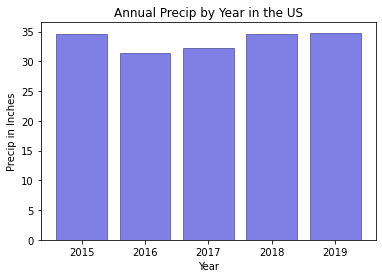

In [50]:
x_axis=fireprcp['Year']
y_axis=fireprcp['NationalPrecp']
plt.bar(x_axis, y_axis, color='mediumblue', edgecolor='midnightblue', alpha=0.5, align='center')
plt.xlabel('Year')
plt.ylabel('Precip in Inches')
plt.title('Annual Precip by Year in the US')

Text(0.5, 1.0, 'Number of Fires by Year in Colorado')

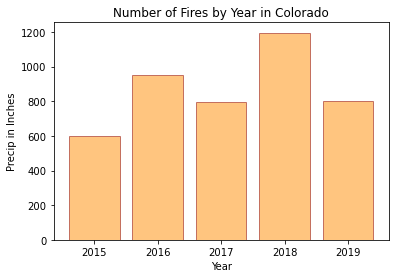

In [31]:
x_axis=fireprcp['Year']
y_axis=fireprcp['FireCount']
plt.bar(x_axis, y_axis, color='darkorange', edgecolor='darkred', alpha=0.5, align='center')
plt.xlabel('Year')
plt.ylabel('Precip in Inches')
plt.title('Number of Fires by Year in Colorado')

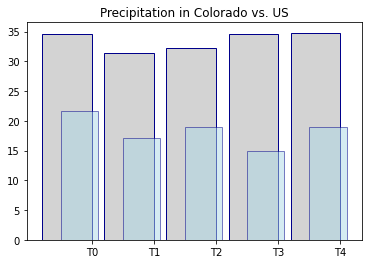

In [57]:
#plot together
width=0.8
highPower=(fireprcp['NationalPrecp'])
lowPower=(fireprcp['ColoPRCP'])


indices = np.arange(len(highPower))
#indices=(percent['Year'])

plt.bar(indices, highPower, width=width, 
        color='lightgrey', edgecolor='darkblue', label='Fire Count')
plt.bar([i+0.25*width for i in indices], lowPower, 
        width=0.75*width, color='lightblue', edgecolor='darkblue', alpha=0.5, label='Precipitation')

#plt.xticks()

plt.xticks(indices+width/2., 
           ['T{}'.format(i) for i in range(len(highPower))] )
plt.title('Precipitation in Colorado vs. US')
# plt.legend()
plt.show()

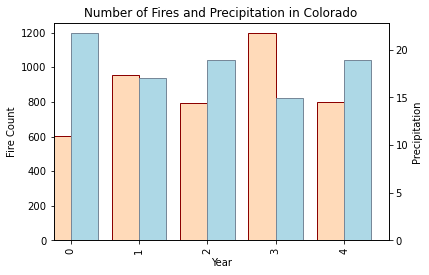

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax2=ax.twinx()
width=0.4
fireprcp.FireCount.plot(kind='bar', color='peachpuff', edgecolor='darkred', ax=ax, width=width, position=1)
fireprcp.PRCP.plot(kind='bar', color='lightblue', edgecolor='lightslategray', ax=ax2, width=width, position=0)

#labels = ['2015', '2016', '2017', '2018', '2019', '2020']
#plt.xticks('2015', '2016')
#plt.xticks(x, labels)
ax.set_ylabel('Fire Count')
ax2.set_ylabel('Precipitation')
ax.set_xlabel('Year')
plt.title('Number of Fires and Precipitation in Colorado')
plt.show()

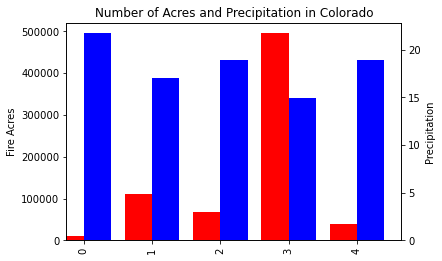

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax2=ax.twinx()
width=0.4
fireprcp.FireAcres.plot(kind='bar', color='red', ax=ax, width=width, position=1)
fireprcp.PRCP.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Fire Acres')
ax2.set_ylabel('Precipitation')
plt.title('Number of Acres and Precipitation in Colorado')
plt.show()

In [34]:
# # Histogram Plot of Da
# plt.subplot(2, 1, 2)
# plt.hist(precp, 10, density=True, alpha=0.7, label="precipitation")
# plt.hist(firect, 10, density=True, alpha=0.7, label="firect")
# plt.axvline(precp.mean(), color='k', linestyle='dashed', linewidth=1)
# plt.axvline(fireact.mean(), color='k', linestyle='dashed', linewidth=1)
# plt.legend()  
    
# return precp, firect

In [35]:
fireprcp

,Year,FireCount,FireAcres,PRCP
0,2015,602,10177.700,21.73
1,2016,954,110153.095,17.08
2,2017,794,67968.940,18.91
3,2018,1196,495431.910,14.96
4,2019,802,38173.540,18.91


In [36]:
precpsum=(fireprcp['PRCP']).sum()
firesum=(fireprcp['FireCount']).sum()
acressum=(fireprcp['FireAcres']).sum()
print(f'sum of precip={precpsum},sum of fire {firesum}, sum of acres {acressum}')

sum of precip=91.59,sum of fire 4348, sum of acres 721905.185


In [37]:
percent=fireprcp[['Year', 'FireCount', 'FireAcres', 'PRCP']]
percent['AvePRCP']=((percent['PRCP']/116.33)*100)
percent['AveCount']=((percent['FireCount']/5426)*100)
percent['AveAcres']=((percent['FireAcres']/1347261.185)*100)

percent

,Year,FireCount,FireAcres,PRCP,AvePRCP,AveCount,AveAcres
0,2015,602,10177.700,21.73,18.679618,11.094729,0.755436
1,2016,954,110153.095,17.08,14.682369,17.582013,8.176076
2,2017,794,67968.940,18.91,16.255480,14.633247,5.044971
3,2018,1196,495431.910,14.96,12.859967,22.042020,36.773264
4,2019,802,38173.540,18.91,16.255480,14.780686,2.833418


In [38]:
# Run the chi square test with stats.chisquare()
stats.chisquare(percent['AveCount'], percent['AvePRCP'])

Power_divergenceResult(statistic=10.504217320682852, pvalue=0.032738947072304195)

In [39]:
# Run the chi square test with stats.chisquare()
stats.chisquare(percent['AveAcres'], percent['AvePRCP'])

Power_divergenceResult(statistic=83.36339024103681, pvalue=3.3737389261923725e-17)

In [40]:
# Run the chi square test with stats.chisquare()
stats.chisquare(percent['AveCount'], percent['AveAcres'])

Power_divergenceResult(statistic=226.83043992875378, pvalue=6.351548307145906e-48)

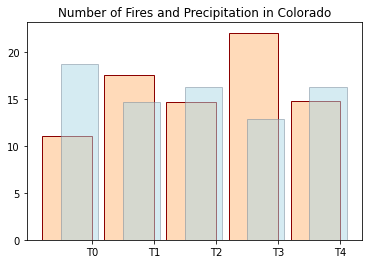

In [41]:
#plot together
width=0.8
highPower=(percent['AveCount'])
lowPower=(percent['AvePRCP'])


indices = np.arange(len(highPower))
#indices=(percent['Year'])

plt.bar(indices, highPower, width=width, 
        color='peachpuff', edgecolor='darkred', label='Fire Count')
plt.bar([i+0.25*width for i in indices], lowPower, 
        width=0.75*width, color='lightblue', edgecolor='lightslategray', alpha=0.5, label='Precipitation')

#plt.xticks()

plt.xticks(indices+width/2., 
           ['T{}'.format(i) for i in range(len(highPower))] )
plt.title('Number of Fires and Precipitation in Colorado')
# plt.legend()
plt.show()


In [42]:
indices

array([0, 1, 2, 3, 4])

In [ ]:
#create graph
